In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('OnlineRetail.csv', encoding='ISO-8859-1')

In [3]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


In [4]:
df.shape

(541909, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [7]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [8]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Min values show negative number. Regarding the characteristic of Quantity and UnitPrice, it doesn't make sense for the 2 columns to bear negative values.

In [9]:
df.loc[df['Quantity'] < 0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-01-12 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-01-12 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-01-12 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-01-12 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-01-12 10:24:00,0.29,17548.0,United Kingdom


In [10]:
df.loc[df['UnitPrice'] < 0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-12-08 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-12-08 14:52:00,-11062.06,NaN,United Kingdom


In [11]:
df['cancellation'] = df.InvoiceNo.str.extract('([C])').fillna(0).replace({'C':1})
df['cancellation'].value_counts()

0    532621
1      9288
Name: cancellation, dtype: int64

In [12]:
df[df['cancellation'] == 1]['CustomerID'].nunique() / df['CustomerID'].nunique() * 100

36.34492223238792

In [13]:
df.duplicated().value_counts()

False    536641
True       5268
dtype: int64

In [14]:
df.loc[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cancellation
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-01-12 11:45:00,1.25,17908.0,United Kingdom,0
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-01-12 11:45:00,2.10,17908.0,United Kingdom,0
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-01-12 11:45:00,2.95,17908.0,United Kingdom,0
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-01-12 11:45:00,4.95,17908.0,United Kingdom,0
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-01-12 11:49:00,2.95,17920.0,United Kingdom,0
...,...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-09-12 11:34:00,0.39,14446.0,United Kingdom,0
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-09-12 11:34:00,2.49,14446.0,United Kingdom,0
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-09-12 11:34:00,1.95,14446.0,United Kingdom,0
541699,581538,22694,WICKER STAR,1,2011-09-12 11:34:00,2.10,14446.0,United Kingdom,0


In [15]:
df.query("Description == 'BLACK PIRATE TREASURE CHEST'")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cancellation
356,536401,22068,BLACK PIRATE TREASURE CHEST,2,2010-01-12 11:21:00,1.65,15862.0,United Kingdom,0
1492,536544,22068,BLACK PIRATE TREASURE CHEST,1,2010-01-12 14:32:00,3.36,NaN,United Kingdom,0
10409,537237,22068,BLACK PIRATE TREASURE CHEST,1,2010-06-12 09:58:00,3.36,NaN,United Kingdom,0
11173,537240,22068,BLACK PIRATE TREASURE CHEST,2,2010-06-12 10:08:00,3.36,NaN,United Kingdom,0
13470,537434,22068,BLACK PIRATE TREASURE CHEST,1,2010-06-12 16:57:00,3.36,NaN,United Kingdom,0
...,...,...,...,...,...,...,...,...,...
540153,581469,22068,BLACK PIRATE TREASURE CHEST,2,2011-08-12 19:28:00,0.39,14606.0,United Kingdom,0
540721,581492,22068,BLACK PIRATE TREASURE CHEST,1,2011-09-12 10:03:00,3.29,NaN,United Kingdom,0
541609,581514,22068,BLACK PIRATE TREASURE CHEST,14,2011-09-12 11:20:00,0.39,17754.0,United Kingdom,0
541631,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-09-12 11:34:00,0.39,14446.0,United Kingdom,0


While investigating the dataframe for duplicates, we can see some unusual pattern in the UnitPrice. There are 'NaN' values in the column CustomerID

Overall, the dataframe contains no suspicious duplicates

In [16]:
df['CustomerID'].isnull().sum()

135080

# 2. Data preparation

In [17]:
df2 = df.copy()

In [18]:
df2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cancellation
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,0
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,0
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-09-12 12:50:00,0.85,12680.0,France,0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-09-12 12:50:00,2.10,12680.0,France,0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-09-12 12:50:00,4.15,12680.0,France,0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-09-12 12:50:00,4.15,12680.0,France,0


In [19]:
df2.drop(df2[df2['Quantity'] < 0].index, inplace=True)
df2.drop(df2[df2['UnitPrice'] < 0].index, inplace=True)

In [20]:
df2.reset_index(drop=True)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cancellation
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,0
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,0
...,...,...,...,...,...,...,...,...,...
531278,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-09-12 12:50:00,0.85,12680.0,France,0
531279,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-09-12 12:50:00,2.10,12680.0,France,0
531280,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-09-12 12:50:00,4.15,12680.0,France,0
531281,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-09-12 12:50:00,4.15,12680.0,France,0


In [21]:
# Compute RFM value

df2['Monetary'] = df2['Quantity'] * df2['UnitPrice'] # Monetary

grouped_data = df2.groupby('CustomerID')

df3 = grouped_data.agg({
    'InvoiceDate':['min', 'max'],
    'InvoiceNo':'count',
    'Monetary':'sum'
}) # Frequency

df3.columns = ['FirstDate', 'RecentDate', 'Frequency', 'Monetary']
df3 = df3.reset_index()

In [22]:
df3

,CustomerID,FirstDate,RecentDate,Frequency,Monetary
0,12346.0,2011-01-18 10:01:00,2011-01-18 10:01:00,1,77183.60
1,12347.0,2010-07-12 14:57:00,2011-10-31 12:25:00,182,4310.00
2,12348.0,2010-12-16 19:09:00,2011-09-25 13:13:00,31,1797.24
3,12349.0,2011-11-21 09:51:00,2011-11-21 09:51:00,73,1757.55
4,12350.0,2011-02-02 16:01:00,2011-02-02 16:01:00,17,334.40
...,...,...,...,...,...
4334,18280.0,2011-07-03 09:52:00,2011-07-03 09:52:00,10,180.60
4335,18281.0,2011-12-06 10:53:00,2011-12-06 10:53:00,7,80.82
4336,18282.0,2011-02-12 11:43:00,2011-05-08 13:35:00,12,178.05
4337,18283.0,2011-01-23 14:58:00,2011-11-30 12:59:00,756,2094.88


In [23]:
# recency

current_date = pd.to_datetime('2012-01-01')
df3['Recency'] = current_date - df3['RecentDate']

In [24]:
df3['Recency'] = pd.to_timedelta(df3['Recency'])
df3['Recency'] = df3['Recency'].dt.days

In [25]:
df3

,CustomerID,FirstDate,RecentDate,Frequency,Monetary,Recency
0,12346.0,2011-01-18 10:01:00,2011-01-18 10:01:00,1,77183.60,347
1,12347.0,2010-07-12 14:57:00,2011-10-31 12:25:00,182,4310.00,61
2,12348.0,2010-12-16 19:09:00,2011-09-25 13:13:00,31,1797.24,97
3,12349.0,2011-11-21 09:51:00,2011-11-21 09:51:00,73,1757.55,40
4,12350.0,2011-02-02 16:01:00,2011-02-02 16:01:00,17,334.40,332
...,...,...,...,...,...,...
4334,18280.0,2011-07-03 09:52:00,2011-07-03 09:52:00,10,180.60,181
4335,18281.0,2011-12-06 10:53:00,2011-12-06 10:53:00,7,80.82,25
4336,18282.0,2011-02-12 11:43:00,2011-05-08 13:35:00,12,178.05,237
4337,18283.0,2011-01-23 14:58:00,2011-11-30 12:59:00,756,2094.88,31


In [26]:
df3['R_rank'] = df3['Recency'].rank(ascending=False)
df3['F_rank'] = df3['Frequency'].rank(ascending=True)
df3['M_rank'] = df3['Monetary'].rank(ascending=True)

# normalizing the rank of the customers

df3['R_rank_norm'] = (df3['R_rank']/df3['R_rank'].max()) * 100
df3['F_rank_norm'] = (df3['F_rank']/df3['F_rank'].max()) * 100
df3['M_rank_norm'] = (df3['M_rank']/df3['M_rank'].max()) * 100

df3.drop(columns={'R_rank', 'F_rank', 'M_rank'}, inplace=True)

df3.head()

# we rank the RFM factors based on the score scale of 100

,CustomerID,FirstDate,RecentDate,Frequency,Monetary,Recency,R_rank_norm,F_rank_norm,M_rank_norm
0,12346.0,2011-01-18 10:01:00,2011-01-18 10:01:00,1,77183.60,347,4.217987,0.841208,99.792579
1,12347.0,2010-07-12 14:57:00,2011-10-31 12:25:00,182,4310.00,61,61.863816,88.107859,92.279327
2,12348.0,2010-12-16 19:09:00,2011-09-25 13:13:00,31,1797.24,97,44.073902,42.118000,76.837981
3,12349.0,2011-11-21 09:51:00,2011-11-21 09:51:00,73,1757.55,40,78.666047,66.570638,76.192671
4,12350.0,2011-02-02 16:01:00,2011-02-02 16:01:00,17,334.40,332,5.472926,24.925098,28.347546


In [27]:
# Rate the RFM_Score on the scale of 5, with "Monetary" \
# bears the most significant share in the formula (since there's no specific business input)

df3['RFM_Score'] = 0.15*df3['R_rank_norm'] + \
    0.28*df3['F_rank_norm'] + 0.57*df3['M_rank_norm']

df3['RFM_Score'] = df3['RFM_Score'] * 0.05

df3 = df3.round(2)

df3[['CustomerID', 'RFM_Score']].head()

,CustomerID,RFM_Score
0,12346.0,2.89
1,12347.0,4.33
2,12348.0,3.11
3,12349.0,3.69
4,12350.0,1.20


In [28]:
# label each rfm_score range

df3['Customer_Segment'] = np.where(df3['RFM_Score'] > 4.5, "Top Customers",
                                  (np.where(df3['RFM_Score'] > 4, "High Value Customers",
                                           (np.where(df3['RFM_Score'] > 3, "Medium Value Customers",
                                                    (np.where(df3['RFM_Score'] > 1.6, "Low Value Customers", 
                                                              "Lost Customers")))))))

df3[['CustomerID', 'RFM_Score', 'Customer_Segment']]

,CustomerID,RFM_Score,Customer_Segment
0,12346.0,2.89,Low Value Customers
1,12347.0,4.33,High Value Customers
2,12348.0,3.11,Medium Value Customers
3,12349.0,3.69,Medium Value Customers
4,12350.0,1.20,Lost Customers
...,...,...,...
4334,18280.0,0.76,Lost Customers
4335,18281.0,0.92,Lost Customers
4336,18282.0,0.73,Lost Customers
4337,18283.0,4.37,High Value Customers


# 3. Feature understanding

## 3.1. RFM analysis

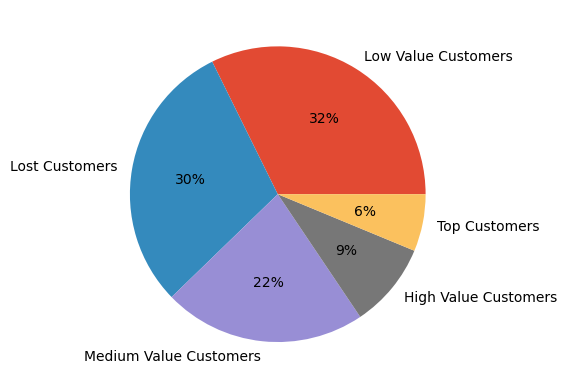

In [29]:
plt.pie(df3.Customer_Segment.value_counts(),
       labels=df3.Customer_Segment.value_counts().index,
        autopct='%.0f%%')
plt.show()

Almost 1/3 of the Customers a low value customers. The other third is lost customers. Top and high value customers are only a small portion within the mix

Overall, the amount of customer within the warning zone is a lot higher than those who are at the safe zone

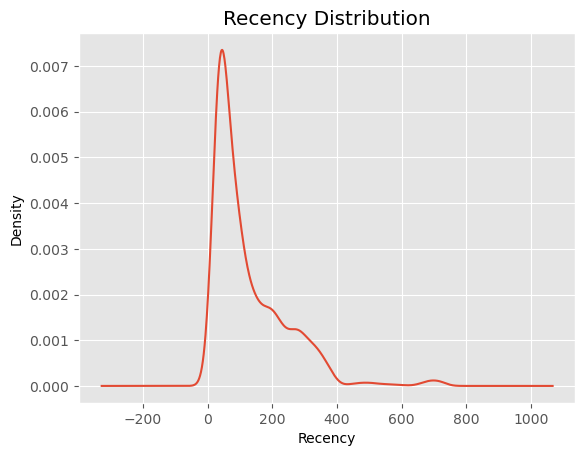

In [30]:
# Recency distribution

rec = df3['Recency'].plot(kind='kde',
                   title='Recency Distribution')
rec.set_xlabel('Recency')

plt.show()

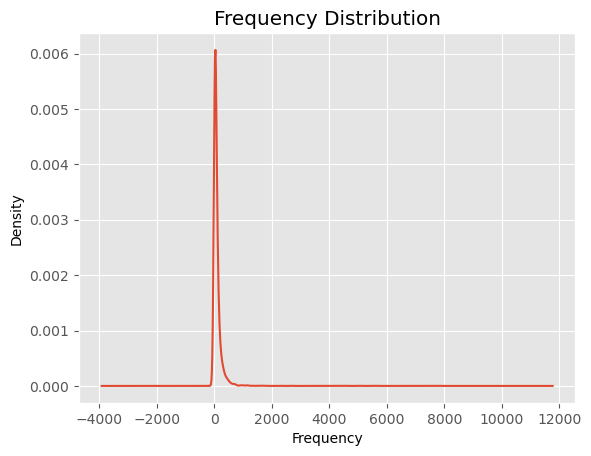

In [31]:
# Frequency distribution

fre = df3['Frequency'].plot(kind='kde',
                    title='Frequency Distribution')
fre.set_xlabel('Frequency')

plt.show()

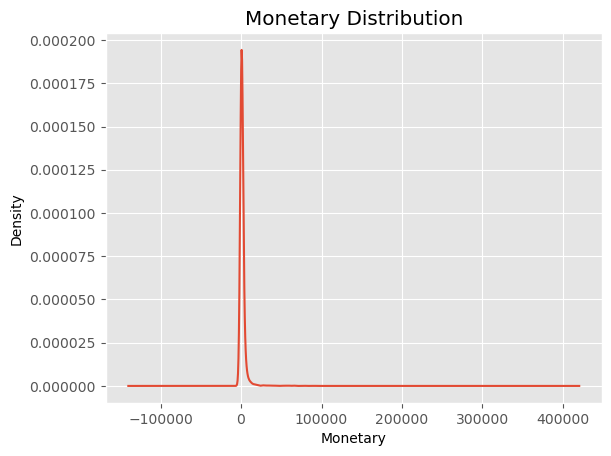

In [32]:
# Monetary distribution

mon = df3['Monetary'].plot(kind='kde',
                    title='Monetary Distribution')
mon.set_xlabel('Monetary')

plt.show()

## 3.2. Correlation analysis

In [33]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cancellation
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,0
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,0
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-09-12 12:50:00,0.85,12680.0,France,0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-09-12 12:50:00,2.10,12680.0,France,0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-09-12 12:50:00,4.15,12680.0,France,0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-09-12 12:50:00,4.15,12680.0,France,0


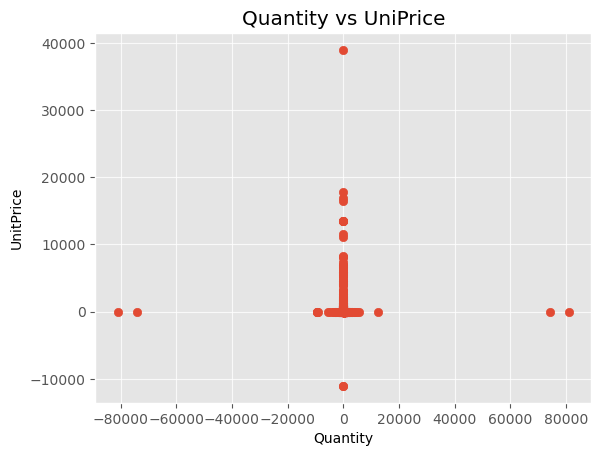

In [34]:
plt.scatter((df['Quantity']), df['UnitPrice'])
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.title('Quantity vs UniPrice')
plt.grid(alpha=0.8)
plt.show()

The scatter plot shows a mild correlation. Overall, prices don't determine much of how much people buy. This proves there's a strong demand for lower-priced products, and less demand for higher-priced products

Negative values represent the cancelled orders, which is 36%

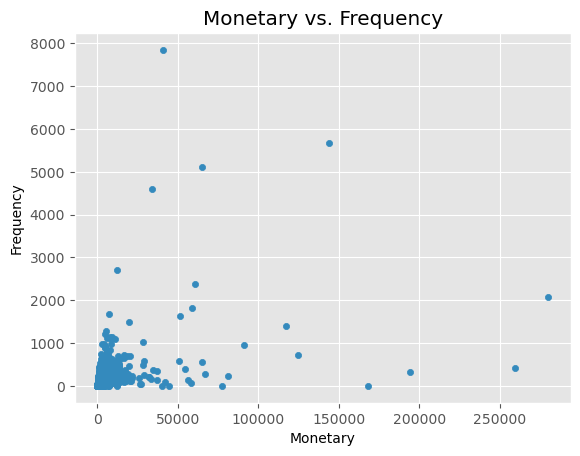

In [35]:
df3.plot(kind='scatter',
          x='Monetary',
          y='Frequency',
        title='Monetary vs. Frequency')
plt.show()

There's a positive correlation between Frequency and Monetary. Those who come back more often tend to spend more than those who just come a few times

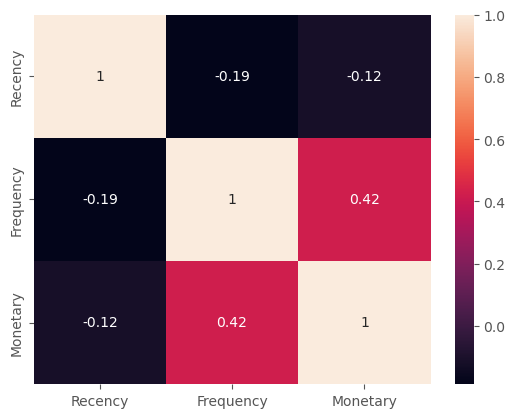

In [36]:
df3_corr = df3[['Recency', 'Frequency', 'Monetary']].dropna().corr()

sns.heatmap(df3_corr, annot=True)

plt.show()

The correlation score between Monetary and Frequency is 0.42, which is average

# 4. Ask questions about the data

In [37]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cancellation
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,0
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,0
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-09-12 12:50:00,0.85,12680.0,France,0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-09-12 12:50:00,2.10,12680.0,France,0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-09-12 12:50:00,4.15,12680.0,France,0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-09-12 12:50:00,4.15,12680.0,France,0


In [38]:
df3

,CustomerID,FirstDate,RecentDate,Frequency,Monetary,Recency,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Customer_Segment
0,12346.0,2011-01-18 10:01:00,2011-01-18 10:01:00,1,77183.60,347,4.22,0.84,99.79,2.89,Low Value Customers
1,12347.0,2010-07-12 14:57:00,2011-10-31 12:25:00,182,4310.00,61,61.86,88.11,92.28,4.33,High Value Customers
2,12348.0,2010-12-16 19:09:00,2011-09-25 13:13:00,31,1797.24,97,44.07,42.12,76.84,3.11,Medium Value Customers
3,12349.0,2011-11-21 09:51:00,2011-11-21 09:51:00,73,1757.55,40,78.67,66.57,76.19,3.69,Medium Value Customers
4,12350.0,2011-02-02 16:01:00,2011-02-02 16:01:00,17,334.40,332,5.47,24.93,28.35,1.20,Lost Customers
...,...,...,...,...,...,...,...,...,...,...,...
4334,18280.0,2011-07-03 09:52:00,2011-07-03 09:52:00,10,180.60,181,25.46,14.35,13.00,0.76,Lost Customers
4335,18281.0,2011-12-06 10:53:00,2011-12-06 10:53:00,7,80.82,25,95.78,9.38,2.42,0.92,Lost Customers
4336,18282.0,2011-02-12 11:43:00,2011-05-08 13:35:00,12,178.05,237,16.36,17.72,12.61,0.73,Lost Customers
4337,18283.0,2011-01-23 14:58:00,2011-11-30 12:59:00,756,2094.88,31,91.24,99.33,80.41,4.37,High Value Customers


### Questions

What are the top 10 purchased products in 2011?

What are the top 10 highest paying customers?

What is the total number of the 5 customer segments?

What is the Customer Lifetime Value?


### Q1: What are the top 10 purchased products in 2011?

In [39]:
df_2011 = df[df['InvoiceDate'].dt.year == 2011]

In [40]:
grouped = df_2011.groupby('Description')

grouped_des = grouped.agg({
    'Quantity':'sum'
})

gd = grouped_des.sort_values(by='Quantity', ascending=False)
gd1 = gd.reset_index()
gd1.head(10)

,Description,Quantity
0,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48652
1,JUMBO BAG RED RETROSPOT,45237
2,POPCORN HOLDER,36334
3,ASSORTED COLOUR BIRD ORNAMENT,34010
4,WHITE HANGING HEART T-LIGHT HOLDER,31974
5,PACK OF 72 RETROSPOT CAKE CASES,31963
6,RABBIT NIGHT LIGHT,30680
7,MINI PAINT SET VINTAGE,23727
8,PACK OF 12 LONDON TISSUES,23621
9,PACK OF 60 PINK PAISLEY CAKE CASES,23029


In [41]:
gd1.dtypes

Description    object
Quantity        int64
dtype: object

In [42]:
gd1 = gd1.iloc[0:10]

In [43]:
gd1

,Description,Quantity
0,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48652
1,JUMBO BAG RED RETROSPOT,45237
2,POPCORN HOLDER,36334
3,ASSORTED COLOUR BIRD ORNAMENT,34010
4,WHITE HANGING HEART T-LIGHT HOLDER,31974
5,PACK OF 72 RETROSPOT CAKE CASES,31963
6,RABBIT NIGHT LIGHT,30680
7,MINI PAINT SET VINTAGE,23727
8,PACK OF 12 LONDON TISSUES,23621
9,PACK OF 60 PINK PAISLEY CAKE CASES,23029


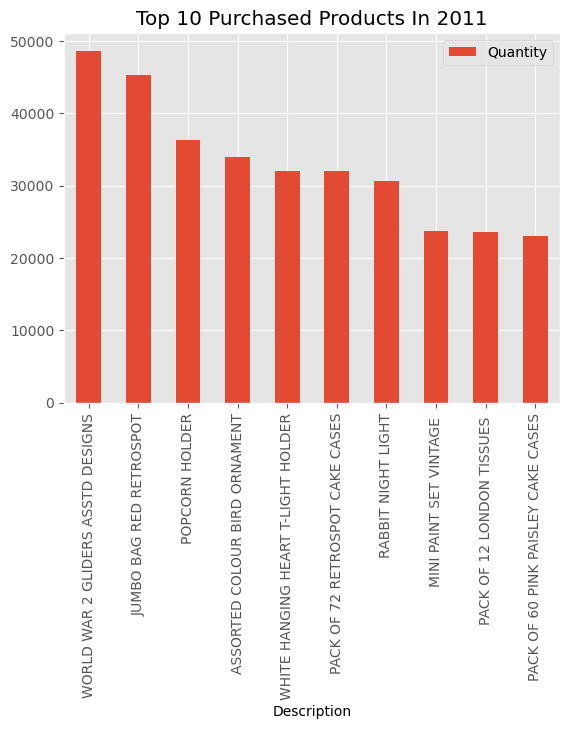

In [44]:
gd1.plot(kind='bar',
        x='Description',
        y='Quantity',
        title='Top 10 Purchased Products In 2011')
plt.show()

World War 2 Gliders ASSTD Designs had the most sale in 2011

### Q2: What are the top 10 highest paying customers?

In [45]:
top = df3.sort_values(by='Monetary', ascending=False)

top = top.iloc[0:10]

top

,CustomerID,FirstDate,RecentDate,Frequency,Monetary,Recency,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Customer_Segment
1690,14646.0,2010-12-20 10:09:00,2011-12-08 12:36:00,2080,280206.02,23,97.35,99.86,100.00,4.98,Top Customers
4202,18102.0,2010-07-12 16:42:00,2011-11-28 12:55:00,431,259657.30,33,87.31,97.37,99.98,4.87,Top Customers
3729,17450.0,2010-07-12 09:23:00,2011-12-07 09:04:00,337,194550.79,24,96.55,95.67,99.95,4.91,Top Customers
3009,16446.0,2011-05-18 09:52:00,2011-09-12 09:15:00,3,168472.50,110,39.75,3.53,99.93,3.20,Medium Value Customers
1880,14911.0,2010-01-12 14:05:00,2011-12-10 14:08:00,5677,143825.06,21,100.00,99.98,99.91,5.00,Top Customers
55,12415.0,2011-01-04 14:28:00,2011-11-15 14:22:00,716,124914.53,46,71.07,99.24,99.88,4.77,Top Customers
1334,14156.0,2010-03-12 11:48:00,2011-12-10 09:29:00,1400,117379.63,21,100.00,99.75,99.86,4.99,Top Customers
3772,17511.0,2010-01-12 10:19:00,2011-12-04 13:24:00,963,91062.38,27,93.45,99.47,99.84,4.94,Top Customers
2703,16029.0,2010-01-12 09:57:00,2011-11-10 11:15:00,242,81024.84,51,66.69,92.21,99.82,4.64,Top Customers
0,12346.0,2011-01-18 10:01:00,2011-01-18 10:01:00,1,77183.60,347,4.22,0.84,99.79,2.89,Low Value Customers


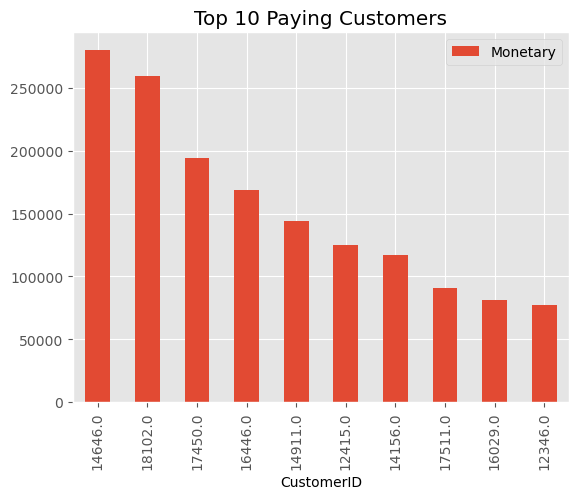

In [46]:
top.plot(kind='bar',
        x='CustomerID',
        y='Monetary',
        title='Top 10 Paying Customers')
plt.show()

Question 2: CustomerID 14646 has the highest purchase, with $280.206 USD

### Q3: What is the total number of the 5 customer segments?

In [47]:
grouped_cs = df3.groupby('Customer_Segment')

cs = grouped_cs.agg({
    'CustomerID':'count'
})

In [48]:
cs = cs.reset_index()

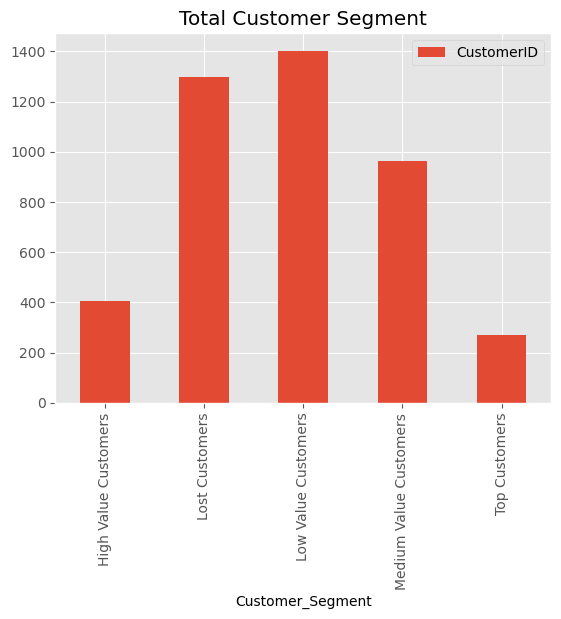

In [49]:
cs.plot(kind='bar',
        x='Customer_Segment',
        title='Total Customer Segment')
plt.show()

Question 3: Low value customers have a significant share within the mix, while top and high value customers are the lowest of all

### Q4: What is the Customer Lifetime Value?

In [50]:
df3

,CustomerID,FirstDate,RecentDate,Frequency,Monetary,Recency,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Customer_Segment
0,12346.0,2011-01-18 10:01:00,2011-01-18 10:01:00,1,77183.60,347,4.22,0.84,99.79,2.89,Low Value Customers
1,12347.0,2010-07-12 14:57:00,2011-10-31 12:25:00,182,4310.00,61,61.86,88.11,92.28,4.33,High Value Customers
2,12348.0,2010-12-16 19:09:00,2011-09-25 13:13:00,31,1797.24,97,44.07,42.12,76.84,3.11,Medium Value Customers
3,12349.0,2011-11-21 09:51:00,2011-11-21 09:51:00,73,1757.55,40,78.67,66.57,76.19,3.69,Medium Value Customers
4,12350.0,2011-02-02 16:01:00,2011-02-02 16:01:00,17,334.40,332,5.47,24.93,28.35,1.20,Lost Customers
...,...,...,...,...,...,...,...,...,...,...,...
4334,18280.0,2011-07-03 09:52:00,2011-07-03 09:52:00,10,180.60,181,25.46,14.35,13.00,0.76,Lost Customers
4335,18281.0,2011-12-06 10:53:00,2011-12-06 10:53:00,7,80.82,25,95.78,9.38,2.42,0.92,Lost Customers
4336,18282.0,2011-02-12 11:43:00,2011-05-08 13:35:00,12,178.05,237,16.36,17.72,12.61,0.73,Lost Customers
4337,18283.0,2011-01-23 14:58:00,2011-11-30 12:59:00,756,2094.88,31,91.24,99.33,80.41,4.37,High Value Customers


In [51]:
# to measure CLV, I apply the formula : (Average Purchase Value) x (Purchase Frequency) x (Customer Lifespan)
# Customer lifespan = (recent purchase - first purchase) * total customer

df3['Customer_Lifespan'] = (df3['RecentDate'] - df3['FirstDate']) 

df3['Customer_Lifespan'] = pd.to_timedelta(df3['Customer_Lifespan'])
df3['Customer_Lifespan'] = df3['Customer_Lifespan'].dt.days

df3['Customer_Lifespan'] = df3['Customer_Lifespan'] / 4339

df3['Average_Purchase'] = df3['Monetary'] / df3['Frequency']

In [52]:
df3['CLV'] = df3['Average_Purchase'] * df3['Frequency'] * df3['Customer_Lifespan']

In [53]:
df3.sort_values(by='CLV', ascending=False)

,CustomerID,FirstDate,RecentDate,Frequency,Monetary,Recency,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Customer_Segment,Customer_Lifespan,Average_Purchase,CLV
4202,18102.0,2010-07-12 16:42:00,2011-11-28 12:55:00,431,259657.30,33,87.31,97.37,99.98,4.87,Top Customers,0.115925,602.453132,30100.857778
1880,14911.0,2010-01-12 14:05:00,2011-12-10 14:08:00,5677,143825.06,21,100.00,99.98,99.91,5.00,Top Customers,0.160636,25.334694,23103.495464
3729,17450.0,2010-07-12 09:23:00,2011-12-07 09:04:00,337,194550.79,24,96.55,95.67,99.95,4.91,Top Customers,0.118000,577.302047,22956.903545
1690,14646.0,2010-12-20 10:09:00,2011-12-08 12:36:00,2080,280206.02,23,97.35,99.86,100.00,4.98,Top Customers,0.081355,134.714433,22796.203056
1334,14156.0,2010-03-12 11:48:00,2011-12-10 09:29:00,1400,117379.63,21,100.00,99.75,99.86,4.99,Top Customers,0.146808,83.842593,17232.271102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2569,15836.0,2011-10-20 17:13:00,2011-10-20 17:13:00,10,137.37,72,55.88,14.35,7.86,0.84,Lost Customers,0.000000,13.737000,0.000000
2566,15832.0,2011-03-30 15:29:00,2011-03-30 15:29:00,54,836.79,276,11.72,58.11,56.76,2.52,Low Value Customers,0.000000,15.496111,0.000000
2564,15830.0,2011-02-11 10:40:00,2011-02-11 10:40:00,39,576.00,323,6.32,48.43,44.55,2.00,Low Value Customers,0.000000,14.769231,0.000000
632,13182.0,2011-10-25 13:46:00,2011-10-25 13:46:00,11,121.18,67,58.26,16.10,6.25,0.84,Lost Customers,0.000000,11.016364,0.000000


In [55]:
df3[['Recency', 'Frequency', 'Monetary', 'RFM_Score', 'Customer_Lifespan', 'Average_Purchase', 'CLV']].dropna().corr()

,Recency,Frequency,Monetary,RFM_Score,Customer_Lifespan,Average_Purchase,CLV
Recency,1.000000,-0.187364,-0.116816,-0.553937,-0.445221,0.023190,-0.117154
Frequency,-0.187364,1.000000,0.422289,0.418731,0.353439,-0.012540,0.473856
Monetary,-0.116816,0.422289,1.000000,0.274853,0.240237,0.287266,0.927343
RFM_Score,-0.553937,0.418731,0.274853,1.000000,0.684086,0.011334,0.248315
Customer_Lifespan,-0.445221,0.353439,0.240237,0.684086,1.000000,-0.015158,0.289233
Average_Purchase,0.023190,-0.012540,0.287266,0.011334,-0.015158,1.000000,0.047546
CLV,-0.117154,0.473856,0.927343,0.248315,0.289233,0.047546,1.000000


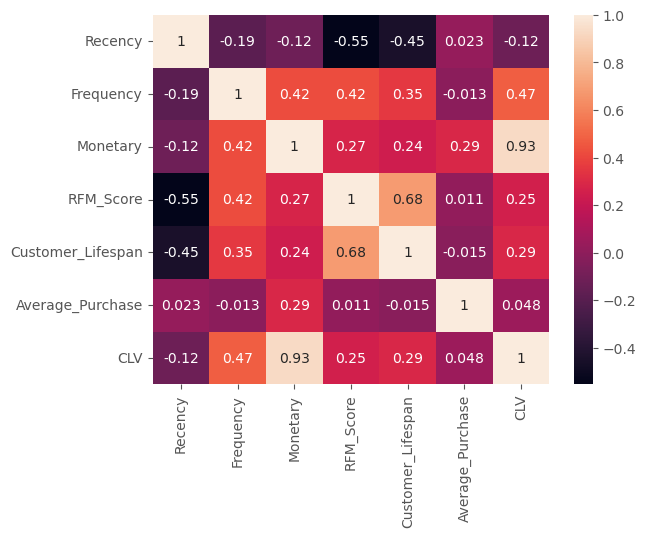

In [56]:
df3_corr = df3[['Recency', 'Frequency', 'Monetary', 'RFM_Score', 'Customer_Lifespan', 'Average_Purchase', 'CLV']].dropna().corr()

sns.heatmap(df3_corr, annot=True)

plt.show()

Based on the heatmap, we can clearly some interesting correlation about CLV and the RFM. 

- Monetary plays a huge role in determining CLV, Frequency is the 2nd factor that contributes significantly to the CLV outcome

One interesting fact is that we may have thought that high average purchase is equivalent to high CLV. However, the case is the opposite. The correlation between average purchase and CLV is as low as 0.048, which proves that even a person that may come in one day spending a lot of money but never comes back will bring no value to the business whatsoever. Meanwhile, Frequency and customer lifespan are somewhat more important to the positive outcome of CLV

